In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual, HBox, VBox, Label
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

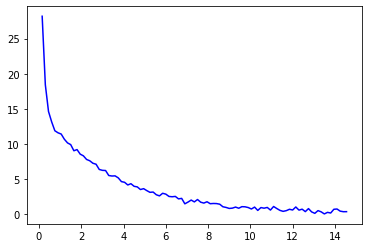

In [2]:
s = np.arange(0.15, 14.7, 0.15) # s domain

tau = [0.3, 8] # decay rates, 1/s

C = 0
C = C + 15*np.exp(-tau[0]*s) #+ 300
C = C + 45*np.exp(-tau[1]*s)
C = C + np.random.normal(1,1,len(C))*2e-1 # adding noize
fig = plt.figure()
plt.plot(s, C, 'b-')

In [3]:
def L1(s, Y, bound, Nz, alpha, iterations = 50000):
    
    """Returns Inverse Laplase Transform of F(s) as Nz lenght vector
     using L1 regularization method  dQ/db = """
    tmin = bound[0]
    tlim = bound[1]
    NF   = len(s)
    Nf   = Nz # 
    t    = tmin*10**(np.linspace(0, 40*np.log10(tlim/tmin), Nf)*0.025) #t domain with exp density points
    dt   = np.diff(t)

    X    = np.zeros([NF, Nf], dtype = float)
    for i in range(NF-1):
            for j in range(Nf-1):
                x1     = -s[i]*(t[j] - dt[j])
                x2     = -s[i]*(t[j] + dt[j])
                X[i,j] = (np.exp(x1) + np.exp(x2))*dt[j]
    np.shape(X)
    
    beta   = np.random.randn(Nf)/np.sqrt(Nf) ## initiating weights
    learning_rate = 0.09
    l1     = alpha
    #costs = []
    for k in range(iterations):
        Yhat  = X@beta
        delta = Yhat - Y
        beta  = beta - learning_rate*(X.T@delta + l1*np.sign(beta))
        #mse   = delta.dot(delta)/NF
        #costs.append(mse)
    F = X@beta    
    #res_norm = np.linalg.norm(Y - X@beta)
    #sol_norm = np.linalg.norm(beta)
    
    return t, beta, F#, res_norm, sol_norm


In [4]:
def L2(s, Y, bound, Nz, alpha, iterations = 50000):
    """Returns Inverse Laplase Transform of F(s) as Nz lenght vector
     using L1 regularization method  dQ/db = """
    tmin = bound[0]
    tlim = bound[1]
    NF   = len(s)
    Nf   = Nz # 
    t    = tmin*10**(np.linspace(0, 40*np.log10(tlim/tmin), Nf)*0.025) #t domain with exp density points
    dt   = np.diff(t)

    X    = np.zeros([NF, Nf], dtype = float)
    for i in range(NF-1):
            for j in range(Nf-1):
                x1     = -s[i]*(t[j] - dt[j])
                x2     = -s[i]*(t[j] + dt[j])
                X[i,j] = (np.exp(x1) + np.exp(x2))*dt[j]
    np.shape(X)
    
    beta   = np.random.randn(Nf)/np.sqrt(Nf) ## initiating weights
    learning_rate = 0.09
    l2     = alpha
    #costs = []
    for k in range(iterations):
        Yhat  = X@beta
        delta = Yhat - Y
        beta  = beta - learning_rate*(X.T@delta + l2*2*beta)
        mse   = delta.dot(delta)/NF
        #costs.append(mse)
    F = X@beta    
    #res_norm = np.linalg.norm(Y - X@beta)
    #sol_norm = np.linalg.norm(beta)
    
    return t, beta, F#, res_norm, sol_norm



In [5]:
def L1L2(s, Y, bound, Nz, alpha1, alpha2, iterations = 50000):
    """Returns Inverse Laplase Transform of F(s) as Nz lenght vector
     using L1 regularization method  dQ/db = """
    tmin = bound[0]
    tlim = bound[1]
    NF   = len(s)
    Nf   = Nz # 
    t    = tmin*10**(np.linspace(0, 40*np.log10(tlim/tmin), Nf)*0.025) #t domain with exp density points
    dt   = np.diff(t)

    X    = np.zeros([NF, Nf], dtype = float)
    for i in range(NF-1):
            for j in range(Nf-1):
                x1     = -s[i]*(t[j] - dt[j])
                x2     = -s[i]*(t[j] + dt[j])
                X[i,j] = (np.exp(x1) + np.exp(x2))*dt[j]
    np.shape(X)
    
    beta   = np.random.randn(Nf)/np.sqrt(Nf) ## initiating weights
    learning_rate = 0.09
    l1     = alpha1
    l2     = alpha2
    #costs = []
    for k in range(iterations):
        Yhat  = X@beta
        delta = Yhat - Y
        beta  = beta - learning_rate*(X.T@delta + l1*np.sign(beta) + l2*2*beta)
        mse   = delta.dot(delta)/NF
        #costs.append(mse)
    F = X@beta    
    #res_norm = np.linalg.norm(Y - X@beta)
    #sol_norm = np.linalg.norm(beta)
    
    return t, beta, F#, res_norm, sol_norm



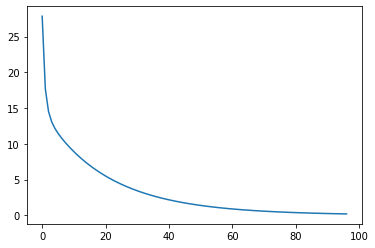

In [6]:
from ilt import SVD
a, b, c = SVD(s, C, [1E-2, 1E2], 100, 0.1)
plt.plot(c)
#plt.plot(C)

In [7]:
lmin = 1E-10
llim = 1E1
L = 100
lmbd_L1 = np.array([1E-1, 0.5E-1])
lmbd_L2 = lmin*10**(np.linspace(0, 40*np.log10(llim/lmin), L)*0.025)  # reg. parameter values

Nz = 100

In [43]:
def plot_data(s, F, data, T, Index):
    """plots stuff"""
    
    fig = plt.figure(figsize = (9.5, 6))
    ax  = fig.add_subplot(211)
    ax.set_title(r'Temperature %.2f K'%T[Index])
    ax.set_ylabel(r'Amplitude, arb. units')
    ax.set_xlabel(r'Emission rate, $s^{-1}$')
    ax.set_xscale('log')
    ax.grid(True, which = "both", ls = "-")
    #print(data[:,2])
    for i, e in enumerate(data[:,-1]):
        if e == 'L1':
            ax.plot(data[i][0], data[i][1], 'r-', label = e)
        elif e == 'L2':
            ax.plot(data[i][0], data[i][1], 'b-', label = e)
        elif e == 'L1+L2':
            ax.plot(data[i][0], data[i][1], 'm-', label = e)
        elif e == 'SVD':
            ax.plot(data[i][0], data[i][1], 'c-', label = e)
    ax.legend()
    
    
    ay = fig.add_subplot(223)
    ay.set_xlabel(r'Residual norm, $\lg{\|A x_{\alpha}-b\|}$')
    ay.set_ylabel(r'Solution norm, $\lg{\|L x_{\alpha}\|}$')
    
    az = fig.add_subplot(224)
    az.set_ylabel(r'Transient , arb. units')
    az.set_xlabel(r'Time $t$, $s$')
    az.grid(True, which = "both", ls = "-")
    F = np.abs(F)
    F = F - min(F)
    F = F/max(F)
    az.plot(s, F, 'k-', label = 'Original')
    az.set_xscale('log')
    for i, e in enumerate(data[:,-1]):
        if e == 'L1':
            d = data[i][2]
            d = np.abs(d)
            d = d - min(d)
            d = d/max(d)
            az.plot(s, d, 'r-', label = e)
        elif e == 'L2':
            d = data[i][2]
            d = np.abs(d)
            d = d - min(d)
            d = d/max(d)
            az.plot(s, d, 'b-', label = e)
        elif e == 'L1+L2':
            d = data[i][2]
            d = np.abs(d)
            d = d - min(d)
            d = d/max(d)
            az.plot(s, d, 'm-', label = e)
        elif e == 'SVD':
            d = data[i][2]
            d = np.abs(d)
            d = d - min(d)
            d = d/max(d)
            az.plot(s, d, 'c-', label = e)
    az.legend()
    
    
    plt.tight_layout()

In [44]:
def laplace(s, F, Nz, Reg_L1, Reg_L2, Methods):
    
    data = []
    
    for i in Methods: 
        if i == 'L1':
            t, f, F_hat = L1(s, F, [1E-2, 1E2], Nz, Reg_L1)
            data.append([t, f, F_hat, 'L1'])
            
        elif i == 'L2':
            t, f, F_hat = L2(s, F, [1E-2, 1E2], Nz, Reg_L2)
            data.append([t, f, F_hat, 'L2'])
            
        elif i == 'L1+L2':
            t, f, F_hat = L1L2(s, F, [1E-2, 1E2], Nz, Reg_L1, Reg_L2)
            data.append([t, f, F_hat, 'L1+L2'])
            
        elif i == 'SVD':
            t, f, F_hat = SVD(s, F, [1E-2, 1E2], Nz, Reg_L1)
            data.append([t, f, F_hat, 'SVD'])

    data = np.asarray(data)
    return data

In [45]:
def read_file(Path):
    ##
    path = 'data.DLTS'
    txt  = np.genfromtxt(path, delimiter='\t')
    T    = txt[0:,0]
    cut  = len(T)

    C    = []
    time = []
    for i in range(0,cut):
        C.append(txt[i][2:-3])

    for i in range(0, len(C[0])):
        time.append(0.15*(i+1))
    C    = np.asarray(C)
    time = np.asarray(time)
    
    #print(T)
    
    return time, C, T


In [46]:
def demo(Index, Nz, Reg_L1, Reg_L2, Methods, Plot, Residuals, Heatplot):
    
    s, C, T = read_file('0')
    cut = len(T)
    cus = len(C[0])
    
    data = laplace(s, C[Index] - C[Index][-1], Nz, Reg_L1, Reg_L2, Methods)
    if Plot:
        plot_data(s, C[Index] - C[Index][-1], data, T, Index)
    if Residuals:
        print('Plotting L-curve...')
        print(Residuals)
    if Heatplot:
        print('Plotting Heatplot...')
        hp(s, C, T, Methods, Index, Reg_L1, Reg_L2)
        

In [47]:
def hp(s, C, T, Methods, Index, Reg_L1, Reg_L2):
    """Returns heatmap and returns files for Cryo PC"""
    from matplotlib import cm
    
    cut = len(T)
    cus = len(C[0])
    
    if len(Methods) > 1:
        print('Choose only one Method')
        Methods = Methods[0]
    
    
    XZ = []
    YZ = []
    ZZ = []
    
    for M in Methods: 
        if M == 'L1':
            for i in range(0, cut):
                YZ.append(np.ones(cus-1)*T[i])
                TEMPE, TEMPX, a = L1(s, C[i] - C[i][-1], [1E-2, 1E2], Nz, Reg_L1)
                XZ.append(TEMPE)
                ZZ.append(TEMPX)
        elif M == 'L2':
            for i in range(0, cut):
                YZ.append(np.ones(cus-1)*T[i])
                TEMPE, TEMPX, a = L2(s, C[i] - C[i][-1], [1E-2, 1E2], Nz, Reg_L2)
                XZ.append(TEMPE)
                ZZ.append(TEMPX)
        elif M == 'L1+L2':
            for i in range(0, cut):
                YZ.append(np.ones(cus-1)*T[i])
                TEMPE, TEMPX, a = L1L2(s, C[i] - C[i][-1], [1E-2, 1E2], Nz, Reg_L1, Reg_L2)
                XZ.append(TEMPE)
                ZZ.append(TEMPX)
        elif M == 'SVD':
            for i in range(0, cut):
                YZ.append(np.ones(cus-1)*T[i])
                TEMPE, TEMPX, a = SVD(s, C[i], [1E-2, 1E2], Nz, Reg_L1)
                XZ.append(TEMPE)
                ZZ.append(TEMPX)
                

    XZ = np.asarray(XZ)
    YZ = np.asarray(YZ)
    ZZ = np.asarray(ZZ)
    
    fig = plt.figure(figsize = (10,4.5))
    a2d = fig.add_subplot(121)

    cmap = cm.bwr
    v = np.amax(np.abs(ZZ))/50
    normalize = plt.Normalize(vmin = -v, vmax = v)

    extent = [-2, 2, (T[-1]), (T[0])]
    a2d.set_xlabel(r'Emission $\log_{10}{(e)}$')
    a2d.set_title(Methods)
    a2d.set_ylabel('Temperature T, K')
    a2d.axvline(x = np.log10(XZ[0][Index]), c = 'k')
    #a2d.grid(True)



    pos = a2d.imshow(ZZ[::1,::1], cmap = cmap,  
               norm = normalize, interpolation = 'none',
               aspect = 'auto', extent = extent)
    plt.colorbar(pos)


    plt.xticks(np.arange(np.log10(XZ.min()),np.log10(XZ.max()),0.9999))
    plt.yticks(np.arange((T.min()),T.max(),20.0))
    
    ad = fig.add_subplot(122)
    ad.plot(T, ZZ[:,Index], c = 'k')
    #ad.legend()

    plt.show()
    plt.tight_layout() 

In [48]:
#from filebrowser import FileBrowser
#File = FileBrowser()
#File.widget()

In [49]:
#File.path

In [50]:
from ipyfilechooser import FileChooser


def interface(File):
    
    t, C, T = File
    
    cut = len(T) - 1
    
    Index = widgets.IntSlider(
        value=1,
        min=0, # max exponent of base
        max=cut, # min exponent of base
        step=1, # exponent step
        description='')
    
    Methods = widgets.SelectMultiple(
        options = ['L1', 'L2', 'L1+L2', 'SVD'],
        value   = ['L1'],
        #rows    = 10,
        description = 'Methods:',
        disabled = False)

    Nz = widgets.IntText(
        value=100,
        description=r'$N_f=$',
        disabled=False)

    Reg_L1 = widgets.FloatLogSlider(
        value=0.1,
        base=10,
        min=-5, # max exponent of base
        max=0.5, # min exponent of base
        step=0.2, # exponent step
        description=r'L1: $\lambda_1$')

    Reg_L2 = widgets.FloatLogSlider(
        value=1E-3,
        base=10,
        min=-12, # max exponent of base
        max=-2, # min exponent of base
        step=0.2, # exponent step
        description=r'L2: $\lambda_2$')

    Plot = widgets.Checkbox(
        value = True,
        description = 'Plot?',
        disabled = False)

    Residuals = widgets.ToggleButton(
        value=False,
        description='Plot L-curve',
        disabled=False,
        button_style='info', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Plots L-curve to choose best value of regularization parameter of L2 reg. method',
        icon='plus')
    
    Heatplot = widgets.ToggleButton(
        value=False,
        description='Plot heatplot',
        disabled=False,
        button_style='warning', # 'success', 'info', 'warning', 'danger' or ''
        tooltip='Plots heatmap of data from choosed file',
        icon='plus')
    
    
    left_box = VBox([Methods])
    centre_box = VBox([Nz, Reg_L1, Reg_L2])
    right_box = VBox([Plot, Residuals, Heatplot])
    ui = widgets.HBox([left_box, centre_box, right_box])
    Slider = widgets.HBox([Label('Transient №'),Index])
    out = widgets.interactive_output(demo, {'Index':Index, 
                                            'Nz':Nz, 'Reg_L1':Reg_L1, 'Reg_L2':Reg_L2, 
                                            'Methods':Methods, 
                                            'Plot':Plot, 'Residuals':Residuals,
                                            'Heatplot': Heatplot})
    display(ui, Slider, out)

In [55]:
interface(read_file('0'))

Output()